In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
df_test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [ ]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_without_label=df_train.drop(['label'],axis=1)

In [ ]:
df_train_without_label.iloc[0].shape

(784,)

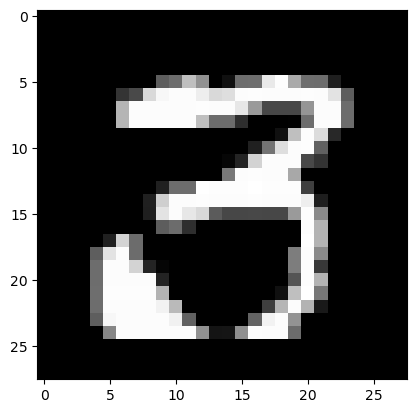

In [ ]:
# pick a sample to plot
sample = 1
image = np.array(df_train_without_label.iloc[np.random.randint(0, 60000)])
image = image.reshape((28,28))
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
df_features = df_train.iloc[:, 1:785]
df_features.head()
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]
X_test_label = df_test.iloc[:,0]
print(X_test.shape)

NameError: name 'df_train' is not defined

In [ ]:
df_features.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)



In [ ]:
X_train.iloc[557]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 47762, Length: 784, dtype: int64

In [ ]:
y_train

11200    1
36984    5
14588    3
9064     5
28044    0
        ..
17509    3
19010    1
23990    9
34458    9
9352     5
Name: label, Length: 48000, dtype: int64

In [ ]:
# Feature Normalization 
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [ ]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [ ]:
model = Model(Inp, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,910
Trainable params: 297,910
Non-trainab

In [ ]:
# Insert Hyperparameters
learning_rate = 0.1
training_epochs = 10
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Epoch 1/10
480/480 - 4s - loss: 1.5865 - accuracy: 0.5798 - val_loss: 0.6448 - val_accuracy: 0.8307 - 4s/epoch - 8ms/step
Epoch 2/10
480/480 - 3s - loss: 0.4825 - accuracy: 0.8641 - val_loss: 0.3850 - val_accuracy: 0.8873 - 3s/epoch - 7ms/step
Epoch 3/10
480/480 - 3s - loss: 0.3547 - accuracy: 0.8980 - val_loss: 0.3186 - val_accuracy: 0.9072 - 3s/epoch - 6ms/step
Epoch 4/10
480/480 - 3s - loss: 0.3025 - accuracy: 0.9126 - val_loss: 0.2716 - val_accuracy: 0.9194 - 3s/epoch - 7ms/step
Epoch 5/10
480/480 - 3s - loss: 0.2675 - accuracy: 0.9230 - val_loss: 0.2458 - val_accuracy: 0.9259 - 3s/epoch - 6ms/step
Epoch 6/10
480/480 - 3s - loss: 0.2410 - accuracy: 0.9308 - val_loss: 0.2269 - val_accuracy: 0.9312 - 3s/epoch - 7ms/step
Epoch 7/10
480/480 - 3s - loss: 0.2201 - accuracy: 0.9369 - val_loss: 0.2099 - val_accuracy: 0.9352 - 3s/epoch - 6ms/step
Epoch 8/10
480/480 - 3s - loss: 0.2018 - accuracy: 0.9421 - val_loss: 0.1888 - val_accuracy: 0.9433 - 3s/epoch - 6ms/step
Epoch 9/10
480/480 - 3s 

In [ ]:
np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
preds=np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


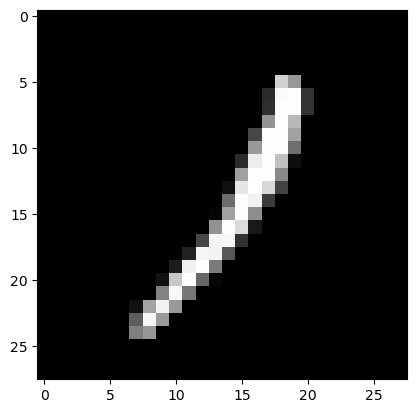

1

In [ ]:
sample = np.random.randint(0, 10000)
image = np.array(X_test.iloc[sample])
image = image.reshape((28,28))
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
preds[sample]

In [ ]:
preds

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
X_test_label

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64